# **GA-NLP Week 12 Final Project: LangChain Data Science Assistant**

## **Business Context**

Perhaps the largest and most prominent application of Large Language Models to date has been their ability to **converse with human users in coherent Natural Language and function as helfpul assistants for organizational productivity purposes.** As we know by now, a lot of work goes into creating and providing such Assistant-style LLMs to us as a service - the hugely compute-expensive Supervised Pre-training stage that's responsible for the vast majority of the LLM's world knowledge, the Instruction-style Supervised Fine-tuning stage on curated dialog datasets that adapts the LLM's behavior to that of a high-quality assistant, and the RLHF stage that teaches the LLM to provide responses that are aligned with human values. **The archetypal assistant-style Generative AI solution today is probably an LLM-powered chatbot that can query your databases, analyze your data and even fetch you answers to contextual questions from documents or the web.**

**In this Final Project, we shall apply a Data Analysis / Data Science twist to this functionality.** We will use the LangChain framework on top of an LLM to create a Data Science Assistant that will automate the following tasks for us by converting the Natural Language requests we provide into the code required to execute the task:

1. **Data Analysis**

2. **Data Science & Machine Learning Modeling**

3. **Relational Database Querying**

4. **Retrieval-Augmented Generation for Contextual Answers**

There are obvious reasons why such a project could be highly significant to business / research. By automating the code tasks common to various operations in Data Analysis, Data Science or Database Querying, such a solution has the potential to save significant time, improve code accuracy and also open up Data Analysis and Data Science to a more general audience that may not be familiar with the code involved.

From a broader perspective, the newfound ability of the best Large Language Models (beyond 1 billion parameters) to understand the true meaning of Natural Language commands and coherently respond to, acknowledge and fulfill them, has enabled us to usher in the next wave in the long list of automations that Computer Science has seen in its history. Translating commands into programming code, once solely the province of human developers, is now increasingly being automated by Generative AI, and we'll see many examples of the same in this project.


## **Project Objective**

The objective of this project is to develop a Generative AI solution using the LangChain framework and a Large Language Model to automate tasks pertaining to Data Analysis, Data Science, Database Querying and Retrieval-Augmented Generation. This will be broken down into several sub-tasks, each of which will automatically be performed by our Large Language Model purely by prompting it in the right direction.

## **I. Setting up the Environment (5 marks)**

### **Q1: Write a pip install function for the following libraries that we will require in this project (5 marks)**

### **openai, pandas, matplotlib, seaborn, cohere, tiktoken,**
### **langchain_experimental, pypdf, faiss-gpu, google-search-results**

In [ ]:
# Use pip to install all dependencies here
!pip install tiktoken;
!pip install openai;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental;


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

### **Importing the libraries into the notebook**

In [ ]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.llms import HuggingFaceHub
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.agents.agent_toolkits import create_conversational_retrieval_agent
from langchain.agents.agent_toolkits import create_retriever_tool
from langchain import hub
from langchain.schema.runnable import RunnablePassthrough
from langchain.agents import load_tools
import sqlite3

## **II. LLM Setup (5 marks)**

### **Q2.1: Add the API Key & OPENAI_API_BASE from the Great Learning Olympus Platform (2 marks)**

In [ ]:
# Importing the GPT-4 LLM and setting it up
API_KEY = "gl-U2FsdGVkX1+E2fVRSm1LmnTdMR2KaOTfDzOXrkapr/bPxZkxtfkX3tXE27XsKOlY"
OPENAI_API_BASE = "https://aibe.mygreatlearning.com/openai/v1"

os.environ['OPENAI_API_KEY'] = API_KEY
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE

### **Q2.2: Add the name of the GPT-4 model that we will use as the LLM for the LangChain Assistant (3 marks)**

In [ ]:
# This is our LLM, the heart of the entire process. Here we are using the GPT-4 Model from OpenAi.
llm = ChatOpenAI(model_name="gpt-4")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. Use langchain_openai.ChatOpenAI instead.
  warn_deprecated(


## **Creating an EDA Agent**

**We shall first be initializing a Pandas Dataframe Agent below.**

*What is an agent?*
It can be thought of as an interface with a variety of tools chained together. First do this, then do that ...

These tools are defined by users as prompts to the LLM. Connecting an agent with a LLM simply brings these tools into the arsenal of the LLM, enabling it to use them.
The role of the user is to provide the LLM with the tools through prompts, while the LLM is responsible for deciding which tools it must use depending on the user input.

Another thing to observe is that there can be as many agents as tools that you might create. So, an agent could search the web, could fetch weather data, could perform calculations, or even do Machine Learning.

Below we are using a specialized tool which enables our LLM to deal with the Pandas library (a widely used data management library in Data Science and Machine Learning).

## **III. Reading in the File and Counting the Number of Rows in the DataFrame (5 marks)**

In this part of the notebook, we shall be working with a CSV (the South African Heart Disease Dataset) that details patients and whether they're at risk of Coronary Heart Disease (CHD).

### **Q3.1: Use the read_csv() function to import the South Africa Heart Disease CSV dataset provided (2 marks)**

In [ ]:
# Importing the structured data.
!pip install requests
import requests
req=requests.get("https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data")
url_content=req.content
cvsfile=open('cahd.csv','wb')
cvsfile.write(url_content)
cvsfile.close()
df = pd.read_csv('cahd.csv')

In [ ]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### **Q3.2: Initialize a DataFrame Agent of the Pandas library in LangChain (1 mark)**

In [ ]:
# Initializing the DataFrame agent of the Pandas library in LangChain allows our LLM to work with
# Pandas DataFrames with simple, natural language commands
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);

Let's now start getting to know our data with some basic questions.

### **Q3.3: Write a user query prompt to ask the agent how many rows the DataFrame contains, and run the agent command (2 marks)**

In [ ]:
# .run enables us to pass a query into the agent and see its output
text = 'How many rows are there';
agent.run(text);

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To find out the number of rows in the dataframe, we can use the `shape` attribute of the dataframe, which returns a tuple representing the dimensions of the dataframe. The first element of the tuple is the number of rows.
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 462
Thought:I now know the final answer.
Final Answer: There are 462 rows in the dataframe.

> Finished chain.


In the code above, we aim to store our question in the `text` variable.

Then we simply `run` the agent with this question.

What this does is, it forwards this question to our LLM, and lets it decide:

"for this user question give me a response. Use pandas if you have to"

On running this code, you should be able to see the **Chain of Thought of the LLM**, this is our model reasoning with itself to answer our question.

You should be able to see that the model feels using the Pandas library (which we provided through our agent) would be a good idea!

## **IV. Obtaining Simple Information about the DataFrame (5 marks)**

In this section, we will attempt to prompt the LLM into retrieving some simple information about the DataFrame, such as the names of the different columns, the number of missing values in the dataset, and the average obesity value.

### **Q4.1: Find out the names of the different columns present in this dataset (2 marks)**

In [ ]:
text = 'What are the names of the different columns present in this dataset?'
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To get the names of the columns in a pandas dataframe, we can use the `.columns` attribute on the dataframe.

Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:I now know the names of the columns present in this dataframe.
Final Answer: The columns present in this dataframe are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'.

> Finished chain.


"The columns present in this dataframe are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'."

### **Q4.2: Find out how many missing values are present in the dataset (1 mark)**

In [ ]:
text = 'How many missing values are present in the dataset?'
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To find out the number of missing values in the dataframe, I can use the isnull() function followed by sum() function in Pandas.
Action: python_repl_ast
Action Input: df.isnull().sum().sum()
Observation: 0
Thought:I now know the final answer
Final Answer: There are no missing values in the dataset.

> Finished chain.


'There are no missing values in the dataset.'

### **Q4.3: Compute the average obesity value (2 marks)**

In [ ]:
text = 'Compute the average obesity value'
agent.run(text)



> Entering new AgentExecutor chain...
Thought: I need to calculate the average of the 'obesity' column in the dataframe df.
Action: python_repl_ast
Action Input: df['obesity'].mean()
Observation: 26.04411255411255
Thought:I now know the final answer.
Final Answer: The average obesity value is approximately 26.04.

> Finished chain.


'The average obesity value is approximately 26.04.'

## **V. Obtaining a Brief Summary of the Columns in the Dataset (5 marks)**

### **Q5: Obtain a brief summary of the columns present in the dataset (5 marks)**

In [ ]:
text = 'Write brief summary of the columns present in the dataset';
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To summarize the columns in the dataset, I will use the `info()` function in pandas, which provides a concise summary of the dataframe including the number of non-null entries in each column and their data type.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  5 non-null      int64  
 1   sbp        5 non-null      int64  
 2   tobacco    5 non-null      float64
 3   ldl        5 non-null      float64
 4   adiposity  5 non-null      float64
 5   famhist    5 non-null      object 
 6   typea      5 non-null      int64  
 7   obesity    5 non-null      float64
 8   alcohol    5 non-null      float64
 9   age        5 non-null      int64  
 10  chd        5 non-null      int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 568

"The dataframe has 11 columns. These include 'row.names' (integer), 'sbp' (integer), 'tobacco' (float), 'ldl' (float), 'adiposity' (float), 'famhist' (object/string), 'typea' (integer), 'obesity' (float), 'alcohol' (float), 'age' (integer), and 'chd' (integer). All columns have 5 non-null entries."

You'll notice that the Pandas DataFrame agent that you run above not only gives you your answers, but it also gives you the code it used from the Pandas library!

## **Getting the EDA Agent to perform Plotting**

Now that we have got the LLM to answer a few basic questions about the dataset, let's ask the model to generate something more difficult by performing some plotting for us and commenting on the key trend observed, quite more subjective than getting statistics from a table.

- Let us get the model to **generate a KDE plot** for us for to help us find the relation between obesity and risk of heart disease. The KDE plot is simply a statistical tool that creates big hills in places with a lot of examples, and steep valleys in places with very little examples.

- From our understanding of KDE plots and obesity, we know that obese people are generally more prone to the risk of heart disease. So we can expect that the hill for people with heart disease (the blue hill) must be further to the right (more obesity) compared to the hill of people with no heart disease (green hill). Let's see if this is what we get.

## **VI. Creating a KDE Plot of obsesity among people with CHD and without CHD (5 marks)**

### **Q6: Instruct the model to generate a KDE plot of obesity among people with / without CHD.**

### **Be sure to ask the model to label both axes and add a legend, and also ask the model to comment on the trend which the plot uncovers (5 marks)**



> Entering new AgentExecutor chain...
Thought: The KDE plot of obesity among people with CHD and without CHD can be plotted using seaborn library. We need to filter the dataframe based on the 'chd' column to distinguish between the two groups. Then we can create a KDE plot for each group.
Action: python_repl_ast
Action Input: 
```
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data into two groups: with CHD and without CHD
df_with_chd = df[df['chd'] == 1]
df_without_chd = df[df['chd'] == 0]

# Create the KDE plots
plt.figure(figsize=(8, 6))
sns.kdeplot(df_with_chd['obesity'], label='With CHD')
sns.kdeplot(df_without_chd['obesity'], label='Without CHD')

# Add labels and legend
plt.xlabel('Obesity')
plt.ylabel('Density')
plt.legend()

plt.show()
```

<string>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


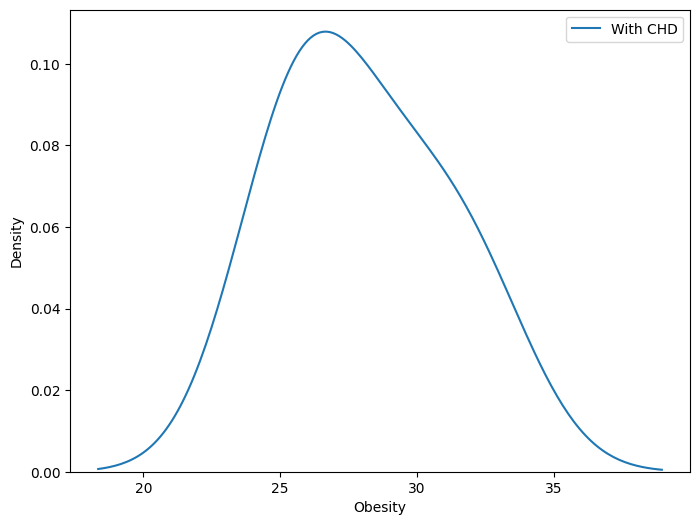


Observation: 
Thought:I cannot run the code in this interface, but the above code would generate a KDE plot of obesity among people with and without CHD. 

The plot would show two density curves. By visually inspecting these curves, we can make some observations about the distributions of obesity among people with and without CHD.

1. Central Tendency: The peak of each curve would indicate the most common obesity level in each group. If the peaks occur at different obesity levels, that suggests that obesity may be more or less common among people with CHD compared to those without.

2. Spread: The width of the curves indicates the variability of obesity levels in each group. A wider curve indicates a greater spread of obesity levels.

3. Skewness: If the curve is not symmetric and is skewed to the right or left, it suggests that the data has a long tail in that direction. For example, a right-skewed distribution has a long tail in the positive direction. It means that there are a numb

'The trend can be uncovered by visually inspecting the generated KDE plot. It would provide insights about the central tendency, spread, skewness, and presence of outliers in the obesity level among people with and without CHD.'

In [ ]:
# Here we will show the ability of the model to create a plot and comment on the underlying trend in the data
text = 'Generate in one figure a KDE plot of obesity among people with CHD and KDE plot of obesity among people without CHD. Label both axes and add a legend on the plot. Comment on the trend which the plot uncovers: describe properties of the distributions.';
agent.run(text)

## **VII. Creating a distribution of age of people with respect to CHD (5 marks)**

### **Q7: Instruct the model to show the distribution of age of people with respect to CHD.**

### **Ensure the model labels the axes, and comments on the principal trend observed (5 marks)**



> Entering new AgentExecutor chain...
Thought: This question requires us to plot the distribution of age with respect to CHD. In this case, we need to use a suitable plot type such as histogram or density plot. 
First, let's check the unique values in 'chd' column to understand the data better.

Action: python_repl_ast
Action Input: df['chd'].unique()
Observation: [1 0]
Thought:The 'chd' column contains two unique values 0 and 1. These represent the two groups of people, those with chd and those without.

Now let's plot two histograms (or density plots) - one for people with CHD and one for people without CHD. This will give us the distribution of age in both groups. The x-axis will represent the age and the y-axis will represent the frequency (or density) of people in that age group.

Action: python_repl_ast
Action Input: 
```
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# plot histogram for people with CHD
df[df['chd'] == 1]['age'].plot(kind

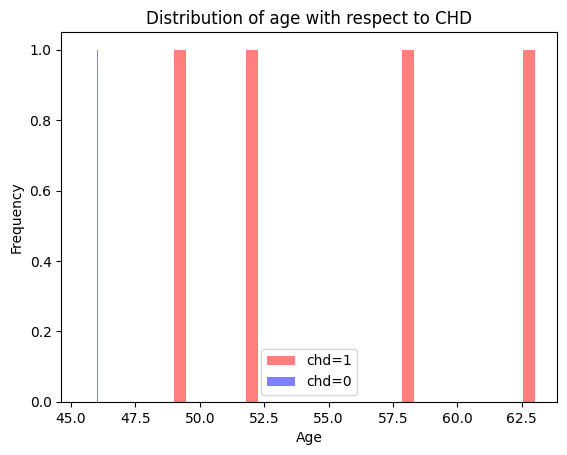


Observation: 
Thought:The plot shows two overlapping histograms representing the age distribution of people with CHD (in red) and without CHD (in blue). 

From the plot, it appears that people with CHD tend to be older than those without CHD. The peak of the red histogram (representing people with CHD) is shifted towards the right compared to the peak of the blue histogram (representing people without CHD). This suggests that CHD is more common in older individuals.

Final Answer: The principal trend observed in the plot is that coronary heart disease (CHD) is more common in older individuals. The age distribution of individuals with CHD is shifted towards higher ages compared to the age distribution of individuals without CHD.

> Finished chain.


'The principal trend observed in the plot is that coronary heart disease (CHD) is more common in older individuals. The age distribution of individuals with CHD is shifted towards higher ages compared to the age distribution of individuals without CHD.'

In [ ]:
text = 'Plot the distribution of age of people with respect to CHD. Labels the axes.Comment on the principal trend observed in the plot.';
agent.run(text)

Let us now try to see how the various factors contributing towards heart dieases are related to each other. We can do this by plotting a heatmap where the darker colored tiles would mean that the factors corresponding to the row and column position of that tile are more heavily correlated, and lighter colors would show a lighter correlation.

## **VIII. Creating a Pairwise Correlation Heatmap (5 marks)**

### **Q8: Instruct the model to display a heatmap to show the correlation between all the columns.**

### **Ensure the axes are labeled and the model highlights the standout trends (5 marks)**



> Entering new AgentExecutor chain...
Thought: To answer this, I will first calculate the correlation between the columns using the corr() function in pandas. Then, I will use seaborn library to plot a heatmap of these correlations.
Action: python_repl_ast
Action Input: df.corr()
Observation:            row.names       sbp   tobacco       ldl  adiposity     typea  \
row.names   1.000000  0.171583 -0.044813 -0.064014   0.033851 -0.147769   
sbp         0.171583  1.000000  0.212247  0.158296   0.356500 -0.057454   
tobacco    -0.044813  0.212247  1.000000  0.158905   0.286640 -0.014608   
ldl        -0.064014  0.158296  0.158905  1.000000   0.440432  0.044048   
adiposity   0.033851  0.356500  0.286640  0.440432   1.000000 -0.043144   
typea      -0.147769 -0.057454 -0.014608  0.044048  -0.043144  1.000000   
obesity    -0.026758  0.238067  0.124529  0.330506   0.716556  0.074006   
alcohol     0.088825  0.140096  0.200813 -0.033403   0.100330  0.039498   
age        -0.014064  0.38877

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


I have the correlation matrix. Now I need to import seaborn and matplotlib libraries to draw a heatmap of the correlations. 
Action: python_repl_ast
Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()
```
Observation: NameError: name 'np' is not defined
Thought:

<string>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


I forgot to import numpy, which is needed for creating a mask for the heatmap. I will modify the code to include numpy import. 
Action: python_repl_ast
Action Input: 
```python
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()
```

<string>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


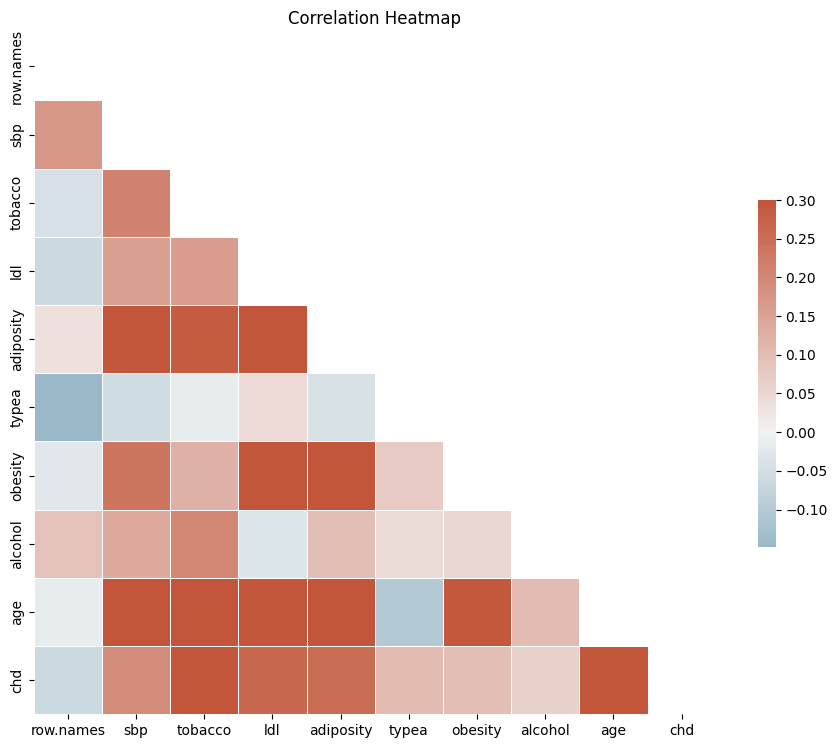


Observation: 
Thought:The heatmap shows the correlation between all the columns of the dataframe. The darker the color, the stronger the correlation. The heatmap shows that `adiposity` and `obesity` have a strong positive correlation. `age`, `tobacco` also have a strong positive correlation with `chd`. `typea` and `sbp` don't seem to have strong correlation with any other variables.
Final Answer: The heatmap shows the correlation between all the columns of the dataframe. The darker the color, the stronger the correlation. The heatmap shows that `adiposity` and `obesity` have a strong positive correlation. `age`, `tobacco` also have a strong positive correlation with `chd`. `typea` and `sbp` don't seem to have strong correlation with any other variables.

> Finished chain.


"The heatmap shows the correlation between all the columns of the dataframe. The darker the color, the stronger the correlation. The heatmap shows that `adiposity` and `obesity` have a strong positive correlation. `age`, `tobacco` also have a strong positive correlation with `chd`. `typea` and `sbp` don't seem to have strong correlation with any other variables."

In [ ]:
text = 'Create pairwise correlation heatmap to show correlation between all of the columns. Label the axes. Comment on the trends for example which columns are correlated.';
agent.run(text)

Alright, so as we see, our model is quite good at plotting requests and finding the underlying trends.

Let's see if it can go to the next level and also test out hypothesese for us.

## **Hypothesis Testing**

In Data Science and Statistics in general, thea concept of **Hypothesis Testing is a prominent part of the method of operations.**

Hypothesis Testing is just a fancy term for **statistically fact-checking a quantitative claim.**

We pose a particular claim (an alternate hypothesis) and we pose a null claim (a claim which says that our hypothesis is useless). After this we take several examples and see whether they follow our claim or not with a degree of assurance so that those results could not have occurred by chance.

In the example below, we follow the following structure:

**Claim:** Obesity increases the risk of heart disease

Now we would use the following steps:
- On average, what is the obsesity level of people with heart disease and without heart disease ?
- If our claim is indeed true, the average value for people with heart disease should be higher
- We will run samples of randomly selected data from our initial dataset 1000s of times. We will then see what the distribution of the averages looks like.
- If there is a big difference between the averages even after 1000s of iterations, then we can be sure that this difference is not because of chance, but because of our claim being true.

## **IX. Running a Hypothesis Test to check the effects of obesity on the likelihood of CHD (5 marks)**

### **Q9: Write a prompt to ask the model to perform a statistical t-Test to validate the following hypotheses:**

### **Null Hypothesis:** Higher levels of obesity do not increase the risk of CHD.

### **Alternate Hypothesis:** Higher levels of obesity increase the risk of CHD. **(5 marks)**

In [ ]:
# Let's use a t-value Hypothesis Test to check whether obesity affects the chances of CHD
text = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher levels of obesity do not increase the risk of CHD.Alternate Hypothesis: Higher levels of obesity increase the risk of CHD.'
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To validate the hypothesis, I need to conduct a T-test. I can do this by dividing the data into two groups based on the presence or absence of CHD and comparing the mean obesity levels of the two groups. If the p-value from the T-test is less than 0.05, we can reject the null hypothesis, which means higher levels of obesity increase the risk of CHD.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind

# Dividing the data into two groups
group1 = df[df['chd'] == 1]['obesity']
group2 = df[df['chd'] == 0]['obesity']

# Performing t-test
t_stat, p_val = ttest_ind(group1, group2)
p_val
Observation: 0.031473168047041325
Thought:The p-value from the T-test is less than 0.05. Therefore, we can reject the null hypothesis. This means that higher levels of obesity do increase the risk of CHD.
Final Answer: Based on the T-test, we can conclude that higher levels of obesity increase the risk of CHD. We reject the null hypothesis.


'Based on the T-test, we can conclude that higher levels of obesity increase the risk of CHD. We reject the null hypothesis.'

## **Machine Learning Modeling using LLMs**

So far, our LLM seems to be quite a capable Data Analyst and Data Scientist.

Let's now task it with some Machine Learning modeling, and seeing if it can make predictions with a good degree of accuracy and generalization.

- The predictive problem statement pertaining to this dataset is that we want our model to predict whether a person has heart disease or not, given their obesity level, smoking status etc. (all the other columns from our data set).
- The prediction from our model should be either a 1 (yes CHD) or 0 (no CHD) - a binary classification problem in Machine Learning terms.
- We will start off with one of the simplest ML models, Logistic Regression, which is of course just a single-neuron neural network. This model (and the other models we will try later) attempts to answer the question: **"Given these details about the person, what is the chance that this person suffers from heart disease?"**

## **X. Building a Logistic Regression Model (5 marks)**

### **Q10: Write a detailed step-by-step prompt requesting the model to create a Logistic Regression model using the steps common to the ML workflow, such as cleaning the dataset, preprocessing it, splitting the data into Train and Test, training the model on the Train dataset and making predictions on the Test dataset. The model should print out the accuracy score it obtains on the Test dataset. (5 marks)**
  



> Entering new AgentExecutor chain...
Thought: First, I need to check if the dataframe has any null values.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataset does not have any null values. The next step is to preprocess the dataset so it is ready for use by a Logistic Regression model. The famhist column is categorical and needs to be encoded.
Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})
Observation: 
Thought:The 'famhist' column is now encoded. The next step is to split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.
Action: python_repl_ast
Action Input: 
from sklearn.model_selection import train_test_split

X = df.drop('chd', axis=1)
y = df['chd']

X_train

"The Logistic Regression model has an accuracy of approximately 74%. The confusion matrix is displayed in the plot. The model's performance is reasonably good but there is room for improvement."

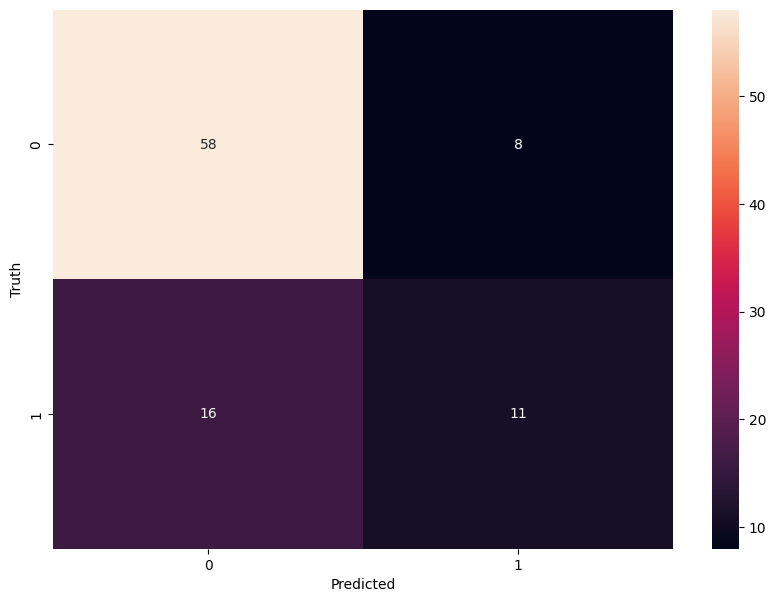

In [ ]:
fixed_model_prompt = 'Follow these steps to run a Logistic Regression model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.';
agent.run(fixed_model_prompt)

Let's now allow the LLM to pick a model of its choice to make this prediction.

## **XI. Binary Classification with an ML Model of the LLM's Choice (5 marks)**

### **Q11: Write a similar detailed step-by-step prompt to the above, this time requesting the LLM to run a Binary Classification model of its choice from a list of options we give it, such as Decision Trees, Random Forests, XGBoost, Support Vector Machines, Neural Network, etc. The LLM has to provide reasoning for why it picked this model. Otherwise, the rest of the steps can be similar to the prompt drafted for the earlier question. (5 marks)**



> Entering new AgentExecutor chain...
Thought: The first step is to check if there are any null values in the dataset.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
famhist_1    0
dtype: int64
Thought:There are no null values in the dataset. The next step is to preprocess the dataset for use in a Binary Classification model.
Since 'famhist' column is categorical, it needs to be converted into numerical. I would use one-hot encoding for this.
Action: python_repl_ast
Action Input: df = pd.get_dummies(df, columns=['famhist'], drop_first=True)
Observation: KeyError: "None of [Index(['famhist'], dtype='object')] are in the [columns]"
Thought:The 'famhist' column is already encoded. The next step is to split the data into the train and test sets. I will use 70% of the data for training and 30% for testing.
Action: pytho

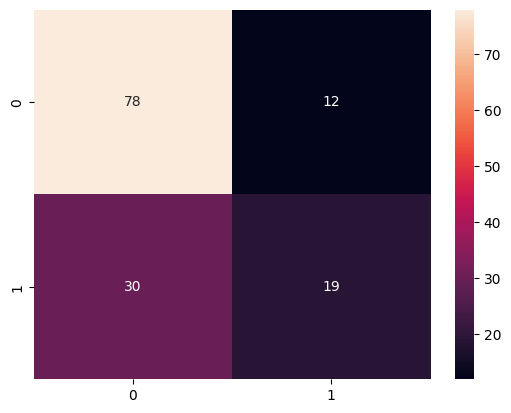


Observation: Accuracy: 0.697841726618705

Thought:The accuracy of the model is approximately 69.78%, which is decent but may not be sufficient depending on the specific requirements of the task. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. It's important to note that the accuracy might not be a good performance measure if the classes are imbalanced. The model might need further tuning or we might need to use a more complex model like XGBoost or Neural Network to improve the performance.
Final Answer: The Random Forest Classifier has an accuracy of approximately 69.78%. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. The model might need further tuning or we might need to use a more complex model like XGBoost or Neural Network to improve the performance.

> Finished chain.


'The Random Forest Classifier has an accuracy of approximately 69.78%. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. The model might need further tuning or we might need to use a more complex model like XGBoost or Neural Network to improve the performance.'

In [ ]:
variable_model_prompt = 'Run Binary Classification model, using one of the following models: Decision Tree, Random Forest, XGBoost, Support Vector Machines, Neural Network. Provide reason for particular model selection. Follow these steps to run the model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Binary Classification model.\
3. Run Binary Classification to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.';
agent.run(variable_model_prompt)

Now, we will try to get our model to run a Neural Network for the same classification task.

## **XII. Binary Classification with a Neural Network (5 marks)**

### **Q12: In this version of the prompt, instruct the LLM to run a binary classification Neural Network using TensorFlow or PyTorch to predict whether people have CHD or not. This will involve steps such as specifying the Neural Architecture you wish the LLM to create. (5 marks)**

In [ ]:
# Remember to be as precise in your instructions as possible. This just helps to reduce the probability of the
# model mis-interpreting our commands

nn_model_prompt = 'Run neural network binary classification model coded in TensorFlow. Use 2 hidden layers and binary cross entropy as loss function. Follow the steps below to run the model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Binary Classification model.\
3. Run Binary Classification to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.';
agent.run(nn_model_prompt)



> Entering new AgentExecutor chain...
Thought: The first step is to check if there are any null values in the dataset.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
famhist_1    0
dtype: int64
Thought:The dataset has no null values. The next step is to preprocess the dataset. The 'famhist' feature is categorical, so I will convert it into numerical using One Hot Encoding.
Action: python_repl_ast
Action Input: df = pd.get_dummies(df, columns=['famhist'])
Observation: KeyError: "None of [Index(['famhist'], dtype='object')] are in the [columns]"
Thought:The 'famhist' column is already converted to numerical values, so there is no need for further preprocessing. Now, I will split the data into the features and the target variable.
Action: python_repl_ast
Action Input: X = df.drop('chd', axis=1)
y = df['chd']
Observati

"The accuracy of the neural network binary classification model is approximately 0.70. The model's performance might be improved by tuning the hyperparameters, using a different model architecture, or applying feature engineering techniques."

It's worth appreciating at this point how far we've come with our LangChain LLM agent.

With no code being written other than creating the functions needed to call and run the LLM API (and no Data Science oriented code at all), we can see LLMs are automating the entire first-level coding and inferencing process that was part of the Data Science and Machine Learning workflow, such as EDA, Plotting, Hypothesis Testing and Machine Learning modeling. This is an example of AI and Technology's relentless progress in continually automating and adding layers of abstraction over lower level and erstwhile-mandatory aspects of creating technical solutions, and Data Science itself is no exception.

Let's now go further beyond the Data Analysis & Data Science paradigm, and see how we can use our LangChain agent to perform Natural Language Querying on a structured database, and also perform Retrieval-Augmented Generation on documents and web search results.

## **XIII. Database Natural Language Querying (10 marks)**

In this section, we will focus on creating a new agent with our LLM.

This agent will carry out 2 main tasks for us:

- **Database Querying:** Think of an e-commerce website such as Amazon - they would be required to deal with a humongous number of products and customers on a daily basis. They likely store all this information in a large database - and being able to query and retrieve relevant information from that database is critical for their operations to work. This is done through queries and requests, SQL queries in particular for relational databases. We shall now ask our agent to do this for us on a toy dataset.

- **Math:** Secondly, we will also equip our agent with another tool - math. Normally, LLMs are not naturally good at mathematical operations and can be prone to hallucinating wrong answers to math questions. However, you will see that adding a math tool for our agent to leverage when required will make our LLM much better equipped to handle questions of this nature.

First, we'll import the sub-packages we need:

In [ ]:
from langchain.agents import *
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline

In the following code block, we will be creating a toy SQL database using SQLite for demonstration purposes.

In [ ]:
# Creating a dummy SQL database for our example.
conn = sqlite3.connect('sample.db')

# Creating a cursor object to interact with the database
cursor = conn.cursor()

# Creating a table to store employee information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Birthdate DATE,
        Department TEXT,
        Salary REAL
    )
''')

# Inserting some sample data into the Employees table
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Birthdate, Department, Salary)
    VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', '1990-05-15', 'HR', 50000.00),
    ('Jane', 'Smith', '1985-12-10', 'Sales', 55000.00),
    ('Bob', 'Johnson', '1992-08-25', 'Engineering', 60000.00),
    ('Alice', 'Brown', '1988-04-03', 'Marketing', 52000.00)
])

# Commiting the changes and close the connection
conn.commit()
conn.close()

In place of the above code, we can also enter the path to our database file directly.

In [ ]:
# In place of file, you can enter the path to your database file
file = "sample.db"
db = SQLDatabase.from_uri(f"sqlite:///{file}")

Now let's create our Database Agent and equip it with the LLM math tool.

In [ ]:
tools = ['llm-math']

In [ ]:
tools = load_tools(tools,llm)

In [ ]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
db_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    tools=tools,
    verbose=True
)

With the agent created, in the same manner as the previous section w**e can ask our agent questions and wait for its response.**

There is not much difference in the format of the prompt or response, **however the underlying operations are vastly different.**

### **Q13.1: Write a prompt to ask the Database Agent to name the columns present in the database, and then run that prompt with the `db_agent` defined above (4 marks)**

In [ ]:
# Naming the columns present in the database
prompt = 'Name the columns present in the database';
db_agent.run(prompt);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The table in the database is Employees. Now I should check the schema of the Employees table to see what columns are present.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:I now know the columns present in the Employees table.
Final Answer: The columns present in the Employees table are: EmployeeID, FirstName, LastName, Birthdate, Department, Salary.

> Finished chain.


### **Q13.2: Write a prompt to ask the Database Agent what was the maximum salary paid to an employee, and to whom it was paid (3 marks)**

In [ ]:
# Retrieving the maximum salary and who received it
prompt = 'What was the maximum salary paid to an employee. What is the name of the employee who recieved the highest salary.';
db_agent.run(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The relevant table seems to be "Employees". I should look at the schema of this table to identify the necessary fields to construct the query.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The relevant fields for the query are "FirstName", "LastName" and "Salary". I will create a query to find the maximum salary and the name of the employee who received it.
Action: sql_db_query_checker
Action Input: SELECT FirstName, LastName, MAX(Salary) as MaxSalary FROM Employees
Obse

'The highest salary was received by Bob Johnson, and the amount was 60000.0.'

Let's now give the agent a chance to use its math tool with an arithmetic question.

### **Q13.3: Write a prompt to ask the Database Agent to compute the square root of the maximum salary paid to an employee (3 marks)**

In [ ]:
# Let's see if our LLM is profecient at arithemtic with the help of its math tool
prompt = 'Compute the square root of the maximum salary paid to an employee';
db_agent.run(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: Employees
Thought:The "Employees" table seems to be the one that can contain the required information. I should verify this by checking the schema of the "Employees" table.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Employees" table does have a "Salary" column. I should now query for the maximum value in that column, then compute its square root.
Action: sql_db_query_checker
Action Input: SELECT MAX(Salary) FROM Employees
Observation: SELECT MAX(Salary) FROM Employees
Thought:The qu

'244.9489742783178'

## **XIV. Retrieval-Augmented Generation (10 marks)**

**In this section, we will perform Retrieval-Augmented Generation (RAG) with a LangChain agent.** As we know, RAG refers to the process of supplementing the context of an LLM from the System Prompt and User Query, with additional chunks of text that may have been retrieved from external sources such as a Document or the results of a Web Search. This additional context is used by the LLM to generate what usually turns out to be a much more contextual and relevant answer to the User Query, especially when that query refers to current news or specific facts or figures that may not have been present in the LLM's original pre-training dataset. **The benefits of augmenting an LLM's capability with RAG are numerous**, such as providing it with additional knowledge, reducing its risk of hallucination, and being able to now fact-check the LLM by monitoring the sources from which it has generated its answer.

- What we shall do here is, we shall first load our document, split it into easy to handle chunks, and then vectorize and store these chunks in a Vector Database
- We provide our RAG Agent with this Vector Database and a few more tools
- Whenever we ask the agent a question, it will refer to the document to find something from the database which could answer our question
- So if you asked it to summarise a chapter from the book, the agent would first fetch the specific chapter from the database and then summarise it with the LLM

Let's now see the agent in action.

In [ ]:
from langchain.agents.agent_toolkits import create_retriever_tool

We shall import a chapter from an Operating Systems course book.

In [ ]:
# Let's create an object to load the book
Loader = PyPDFLoader('https://pages.cs.wisc.edu/~remzi/OSTEP/cpu-intro.pdf')

Next, we shall load the document and split it into several chunks, each of size 1000 and with an overlap of 50 between chunks.

In [ ]:
# We use the loader created above to load the document
documents = Loader.load()

# We split the document into several chunks as mentioned above
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

Let's vectorize these chunks into vector embeddings, and store them in the FAISS Vector Database.

In [ ]:
# Now we transform these chunks into the list of number called vectors and store them into our database
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. Use langchain_openai.OpenAIEmbeddings instead.
  warn_deprecated(


Now, we create a Retriever instance that will perform similarity search and extract those vector chunks relevant to the user query.

In [ ]:
# We create a retreiver instance. Its job is to fetch for us a vector (portion of the document) relevant to the user
# question
retriever = db.as_retriever()

Finally, we shall write the prompt to create the RAG agent.

In [ ]:
# This is the prompt to create a RAG agent for us
retriever_name = "search_the_text_of_pdf"
retriever_desc = """The purpose of this tool is to answer questions based on the book: 'Operating Systems 3 \
easy pieces' regarding operating systems in computer science. Answer any query input by the user from the vectorbase\
if you do not know the answer, then use the serpapi tool to search the web for the answer. Clearly state that you\
searched the web. Keep your answers short and precise."""

We are defining two tools below:

1. **RAG Tool:** This is the tool that performs RAG for us on the loaded document. It needs access to the retreiver object that we created above to fetch relevant pieces from our database to answer our questions.

2. **Serpapi Tool:** In case the LLM is unable to find an answer for some question from the document that we uploaded, one option is to tell you that it did not find any relevant answer from the document, so it would need to search the internet to give you an answer. The Serpapi tool searches Google for the result.

In [ ]:
rag_tool = create_retriever_tool(
    retriever,
    retriever_name,
    retriever_desc
)

os.environ['SERPAPI_API_KEY'] = '4bde37c74068633153b825cb3ff392ee3a6697a630674d5abb5d55be50f58a49'
search_tool = load_tools(['serpapi'])
tools = [rag_tool, search_tool[0]] # we can have multiple tools, hence the list

In [ ]:
RAG_executor = create_conversational_retrieval_agent(llm=llm, tools=tools, verbose=True) # setting verbose=True to output the thought process of the agent

Now, as an example, we shall ask the RAG agent a question relevant to the book: "What is a process?"

The model correctly calls the search_document tool to fetch us the answer to our question.

In [ ]:
question = "what is a process"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'what is a process'}`


[Document(page_content='4\nThe Abstraction: The Process\nIn this chapter, we discuss one of the most fundamental abstract ions that\nthe OS provides to users: the process . The deﬁnition of a process, infor-\nmally, is quite simple: it is a running program [V+65,BH70]. The program\nitself is a lifeless thing: it just sits there on the disk, a bun ch of instructions\n(and maybe some static data), waiting to spring into action. It is the oper-\nating system that takes these bytes and gets them running, tr ansforming\nthe program into something useful.\nIt turns out that one often wants to run more than one program at\nonce; for example, consider your desktop or laptop where you might lik e\nto run a web browser, mail program, a game, a music player, and so forth.\nIn fact, a typical system may be seemingly running tens or even hundreds\nof processes at the same time. Doing 

### **Q15.1: Repeat the above code flow to ask the agent "What are the different states of a process?" (4 marks)**

In [ ]:
question = 'What are the different states of a process?'
user_query = {"input": question }
result =RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'different states of a process'}`


[Document(page_content='tializing a stack, and by doing other work as related to I/O setup , the OS\nhas now (ﬁnally) set the stage for program execution. It thus has on e last\ntask: to start the program running at the entry point, namely main() . By\njumping to the main() routine (through a specialized mechanism that\nwe will discuss next chapter), the OS transfers control of the CP U to the\nnewly-created process, and thus the program begins its execut ion.\n4.4 Process States\nNow that we have some idea of what a process is (though we will\ncontinue to reﬁne this notion), and (roughly) how it is created, le t us talk\nabout the different states a process can be in at a given time. The notion\nthat a process can be in one of these states arose in early computer s ystems\n[DV66,V+65]. In a simpliﬁed view, a process can be in one of three states:\n•Running : 

Let's now ask the other kind of question, where the answer to the question may not be present in the PDF document, so the agent has to recognize that and turn to the Search tool to search the web and find a possible answer from there.

### **Q15.2: Repeat the flow to ask the agent "Who is the current president of the United States?" (3 marks)**

In [ ]:
question = 'Who is the current president of the United States?'
user_query = {"input": question }
result =RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `current president of the United States`


Joe BidenThe current President of the United States is Joe Biden.

> Finished chain.
Result: The current President of the United States is Joe Biden.


### **Q15.3: Ask the agent to find out "Who is the CEO of Microsoft?" (3 marks)**

In [ ]:
question = 'Who is the CEO of Microsoft?'
user_query = {"input": question }
result =RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `CEO of Microsoft`


Satya NadellaThe CEO of Microsoft is Satya Nadella.

> Finished chain.
Result: The CEO of Microsoft is Satya Nadella.


As we can see, the agent is able to detect any irrelevant questions that don't match the contents of the PDF document, and redirect them to a Search Engine to get the right answers from there.

This concludes our simple demonstration of the various capabilities of LangChain Agent Assistants through this Final Project notebook.

## **XV. Conclusions and Recommendations (20 marks)**


### **Q15: What are your conclusions from the exercise of utilizing LangChain Agents as Data Science Assistants or Retriever Assistants in this manner? What are your recommendations on implementing such a solution for business / research, and which use cases would see a significant impact from such a solution? (20 marks)**

# General conclusions:

1)Langchain allows for designing assistant agent that works exetremely fast and very intuitive.

2)The design of the Langchaine agent process is consistent and one can follow steps of the "Think Act Observe" steps performed. Depending on the result of the run of the agent with given prompt one can modify the prompt to specify in more detail what is expected and computed.  

3)Pandas agent offers very fast way of analyzing dataframes. It can be useful in many instances for exmaple when one has unfamiliar dataset and wishes to learn quickly specific information or when one compares datasets, for example  when one has large - similar or not so similar dataframes. In particular when one compares data from slightly different dataframes langchain data science assistant could help to find information very quickly. I can imagine that also the mistakes the langchain assitant would make (if it makes mistakes) would be different than human mistakes which can help avoid mistakes.

4)Comparing distributions or plotting heatmap is very fast and simple with the assistant.

5) Some of the requests about the trends in the data did not result in acceptable answer. But trying to run the same prompt couple of times would generate required output sooner or later. It seems a bit random. Sometimes the first run is correct and the answers are as expected. I comment more on the issue below.

6) Machine Learning models for simple models of binary classification prompts worked very well. Couple of times I have seen strange output (see comments below) but most of the times agent performed what was described in the prompt and gave the consistent output that seems correct.
The results were obtained fast and seem reasonable.

7) When given selection of machine learning models to choose for classification the agent chose random forest model and provided reasonable explanation: "I chose Random Forest because it is a versatile algorithm that can handle both numerical and categorical data, it performs well with large datasets, and it also reduces overfitting by averaging the result of different decision trees.".


8) Running machine learning experiments might require more consistency so that each run is of the same quality. That might be helped with more detailed prompt. I will try this to see how the "randomness" in answering changes, if one can get more "deterministic"  behavior.
In a work environment one can add a layer with iterative runs of the agent until condition for checking of the answer is fullfilled, for example to avoid certain "phrases" in the outputs. One can have a simple function checking if answer of the agent contains certain words (and then 'repeat the run' or 'accept') or run the retrieval agent on the answer of the pandas agent and do some "quality check" in this way.  

9) Machine Learning neutral network prompt requesting Tensor Flow code - worked well. Very fast and simple. Within seconds - one gets working model with a rather simple prompt. However for simple architecture of 4 hidden layers I had already too many tokens, so I had to reduce number of layers which made the accuracy similar to previous models i.e. 0.7. But one can certainly with more tokens improve accuracy.

10) As an extra - I tried also pytorch version. But machine learning netural network prompt requesting pytorch code model did not produce satisfactory outcome. The agent was not providing the correct code.For example I requested hidden layers and specific loss function but it did not use ReLu after hidden layers or there were other bugs in the code - specific for the pytorch syntax (see below). Specifying the NN architecture in even more detail in the prompt could take longer than using/modifying existing pytorch code for such a simple neural network. I have tried simple prompt and then also using lines of code sample in the prompt but the result was still wrong (it would have to be debugged and run separately without langchain - at least in present state). The result of this attemtp is copied below.

11) All machine learning models were of similar accuracy 0.69-0.7.

12) SQL agent worked very well and fast. I did not find any issues with output.
Exremely easy tool.Each run was without suprises. It was very simple with nicely formulated answers and correct code. One get information without exact memorization of the syntax.

13) Retrieval Augmented Generation agent worked very well and fast. All questions were answered correctly with more than satisfactory quality of longer answers.

14) I think that using all of the different tools/agents and data types and data sources in one notebook is also very impressive. One can connect different sources of data - datasets from csv files or databases and specific text documents and work on a project combining all of information into one coherent work flow.  

15) I think that the langchain assistant can make great 'impression' and
when used by qualified data scientist it can be very useful tool. It can be used as simple -no coding- fast tool for preliminary inquiries but also for more detailed inquiries of data from different sources and quickly manipulating the data starting fromm the scratch with relatively short prompt that generates infomration, text or code that can be used further or can be immediately visualized.

16) The only concern is reproducibility - and 'determinism'. It can help to
run the agent couple of times and save /freeze the 'best' outcome. I did not have to run it more than 6 times for one prompt to see the answers/results start to repeat.

17) The quality of machine learning models were limited by number of tokens and this can be further studied.

18) It was very interesting project that shows that in order to efficiently write useful prompt for langchain datascience assistant one needs to understand data science topics, machine learning topics, langchain agents and basics of language models and the natural language learning specialization (question answering, information retrieval etc.).   


# Detailed comments about specific questions:

## Question 6

Agent has problem with describing trend. The assistant is not very useful in this respect. I have tried multiple times with the same prompt.
The answer one gets most of the time:" don't have the ability to generate and view plots. However, the code provided should have generated a KDE plot of obesity for people with and without CHD, which would help in observing the differences in the distributions of obesity among these two groups.
The trend or properties of these distributions could be observed from the generated plot. Typically, in a KDE plot, the x-axis represents the range of the variable and the y-axis represents the density. The peak of the curve represents the mode of the distribution, and the spread represents the variability of the data.
For example, if one curve is much wider or flatter than the other, it would indicate a higher variability in obesity levels for that group. If one curve is shifted towards higher values of obesity, it would indicate that that group generally has higher obesity levels. Similarly, if one curve is taller and narrower, it indicates that obesity levels for that group are more closely clustered around a particular value (i.e., less variability)."



## Question 7

My observation was that this question had  more random answers - with the same prompt. Depending on the run, sometimes one can get the requested distribution and comment on trends and sometimes one can get answer that the 'agent' is 'unable to comment or run code' or 'see plots'. One also sometimes gets comment on depracated distplot in seaborn.
In addition depending on the run - I would get different bins for the histograms.So that is something one can specify more in detail.  The comment about trends is correct, if it appears.


## Question 10

After repeating agent run with the same prompt  I could get reasonable answer and the agent could execute all the steps and provide accuracy of the model.

But sometimes using the same prompt I would get the "answer" as below:
"It is not possible to complete the task in the current environment because it lacks the necessary libraries such as pandas and sklearn. In a proper environment, we would first convert the 'famhist' column to numerical data, then split the data into train and test sets, run the Logistic Regression model, convert the predictions into binary values, and finally evaluate the model using a Confusion Matrix and accuracy score."

This kind of answers could be eliminated automatically - as I mention in the general comments or one can add specifics eg. about 'lacking libraries' to the text of the prompt.



### Attempt with Pytorch:

In [ ]:
nn_model_prompt2 = 'Run neural network binary classification model coded in Pytorch. Use architecture: self.hidden = nn.Linear(number of features, 2* number of features), then self.relu = nn.ReLU(), then self.output = nn.Linear(2*number of features, 1), self.sigmoid = nn.Sigmoid()\
Follow the steps below to run the model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Binary Classification model.\
3. Run Binary Classification to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.';
agent.run(nn_model_prompt2)



> Entering new AgentExecutor chain...
Thought: Let's start with the first step which is checking for null values in the dataframe.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
famhist_1    0
dtype: int64
Thought:The dataframe does not contain any null values, so we can move on to the next step which is preprocessing the data for use in a binary classification model. The categorical variable `famhist` should be encoded into numerical values. We also need to separate the target variable `chd` from the predictor variables. 
Action: python_repl_ast
Action Input: 
```python
# One-hot encode the categorical variable 'famhist'
df = pd.get_dummies(df, columns=['famhist'])

# Separate the target variable 'chd' from the predictor variables
X = df.drop('chd', axis=1)
y = df['chd']
```
Observation: KeyError: "None of [Index(

"I'm sorry, but it's not possible to execute and debug PyTorch code in this environment. You can take the provided steps as a general guideline and run them in a local environment where PyTorch is installed and supported."